In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/MOT16-1.png') # 영상 불러오기

In [3]:
!pip install scikit-image

In [7]:
# 구현에 필요한 라이브러리
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [9]:
# SLIC 알고리즘 적용
segments_slic = slic(img, n_segments=250, compactness=30, sigma=1, start_label=1)
# slic() : 리턴 값은 픽셀별 군집 레이블 번호
# n_segments: 분할된 출력 영상의 대략적인 군집 레이블 수
# compactness : 색상 근접ㄱ성과 공간 근접성의 균형을 유지 값이 높으면 공간 근접성이 더 많은 가중치를 부여하여 정사각형/입방체에 가까워짐
# sigma : 영상의 각 차원에 대한 사전 처리를 위한 가우스 평활화 커널의 너비

In [10]:
# 그룹 수를 화면에 표시
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')

SLIC number of segments: 247


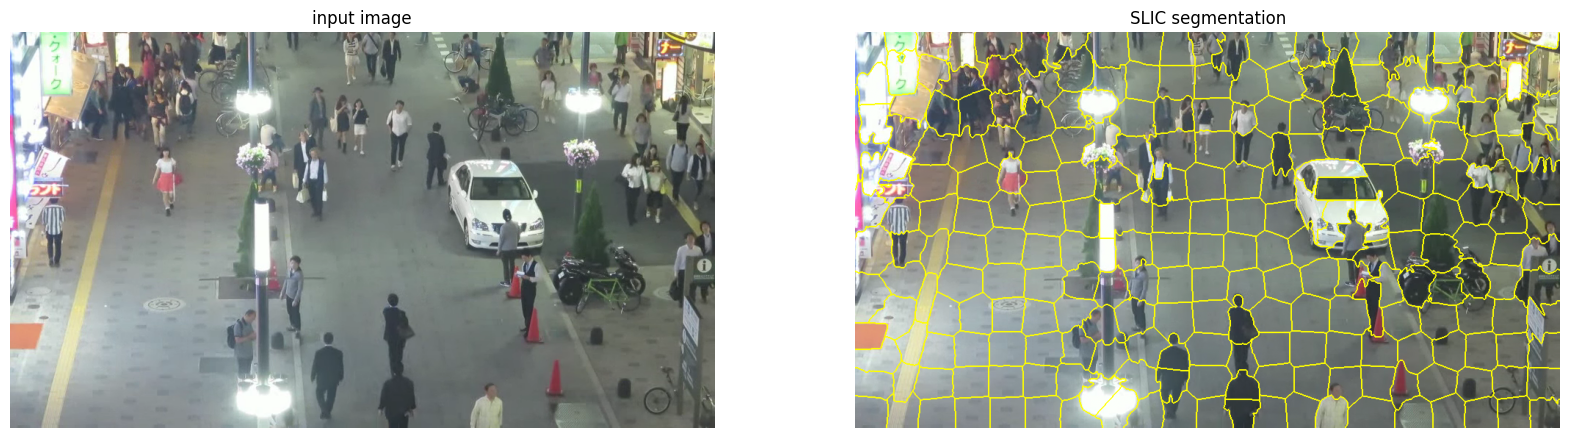

In [11]:
# 결과 영상 출력
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("input image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("SLIC segmentation")
plt.imshow(mark_boundaries(img, segments_slic))
plt.axis("off")
plt.show()